# 逻辑斯蒂回归

## 【关键词】Logistics函数，最大似然估计，梯度下降法

## 1、Logistics回归的原理

利用Logistics回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归” 一词源于最佳拟合，表示要找到最佳拟合参数集。

训练分类器时的做法就是寻找最佳拟合参数，使用的是最优化算法。接下来介绍这个二值型输出分类器的数学原理

Logistic Regression和Linear Regression的原理是相似的，可以简单的描述为这样的过程：

（1）找一个合适的预测函数，一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程是非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有梯度下降法（Gradient Descent）。


### 1)  构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。首先需要先找到一个预测函数（h），显然，该函数的输出必须是两类值（分别代表两个类别），所以利用了*Logistic函数（或称为Sigmoid函数）*，函数形式为：

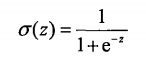

该函数形状为：

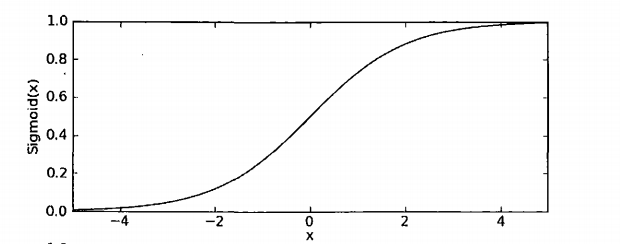

预测函数可以写为：

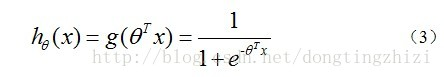

### 2）构造损失函数

Cost函数和J(θ)函数是基于*最大似然估计*推导得到的。

每个样本属于其真实标记的概率，即似然函数，可以写成：

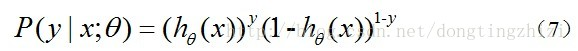

所有样本都属于其真实标记的概率为

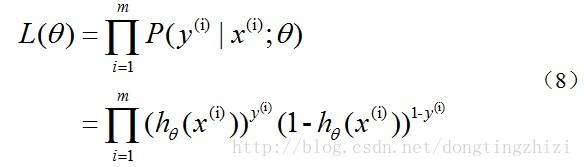

对数似然函数为

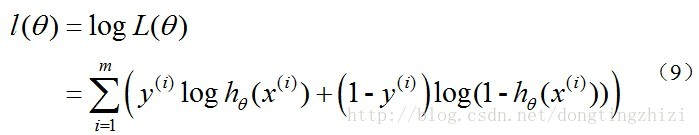

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数

### 3) 梯度下降法求J(θ)的最小值

求J(θ)的最小值可以使用*梯度下降法*，根据梯度下降法可得θ的更新过程:

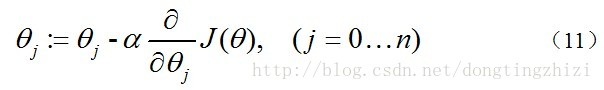

式中为α学习步长，下面来求偏导：

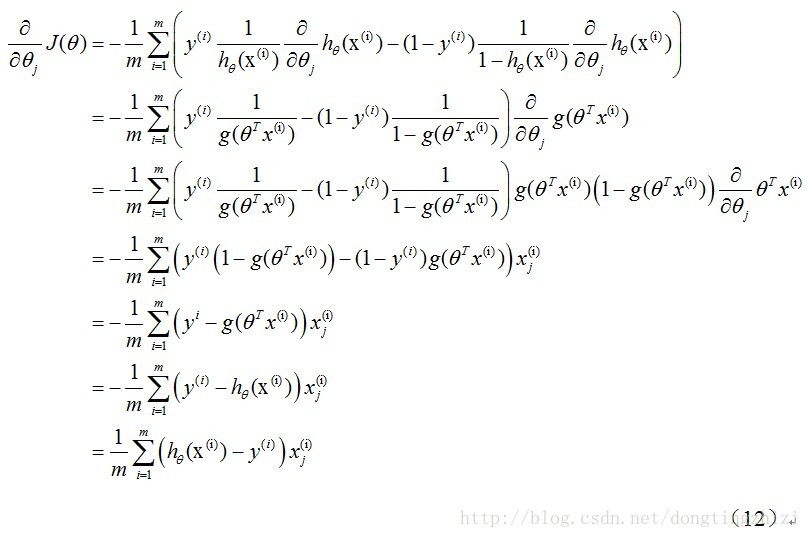

上式求解过程中用到如下的公式：

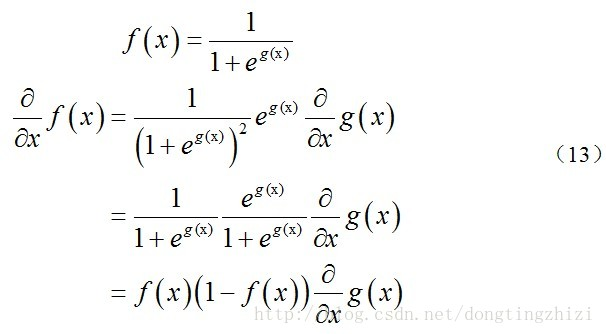

因此，θ的更新过程可以写成:

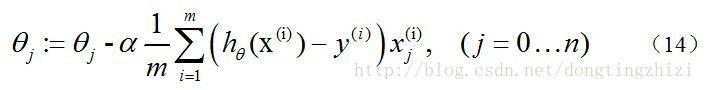

因为式中α本来为一常量，所以1/m一般将省略，所以最终的θ更新过程为：

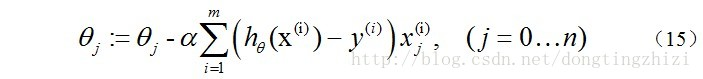

## 2、实战

`
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
`

solver参数的选择：
- “liblinear”：小数量级的数据集
- “lbfgs”, “sag” or “newton-cg”：大数量级的数据集以及多分类问题
- “sag”：极大的数据集

### 逻辑斯提 Logistic 总结
- 是一个线性回归模型，处理二分类问题
- 概率论
- 对分类边界建立回归公式
- 不能处理回归问题

### 1) 手写数字数据集的分类

使用KNN与Logistic回归两种方法
- 数据 load_digits() 函数

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_digits

数据
- digits.data 样本数据
- digits.target 目标数据
- digits.images 图片

In [3]:
digits = load_digits()

In [5]:
digits.images.shape

(1797, 8, 8)

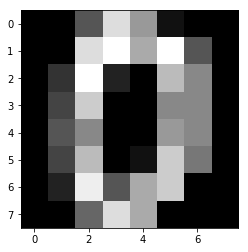

In [14]:
# 显示一张图片
plt.imshow(digits.images[0], cmap='gray')

In [6]:
digits.data.shape

(1797, 64)

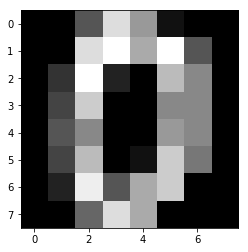

In [20]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

切分训练与预测数据： train_test_split()

In [23]:
from sklearn.model_selection import train_test_split

split = train_test_split  # 函数对象赋值或重命名

X_tr, X_te, y_tr, y_te = split(digits.data, digits.target)

In [24]:
X_tr.shape

(1347, 64)

In [25]:
X_te.shape

(450, 64)

创建模型，训练和预测
- LogisticRegression(C=0.1)
    - C惩罚系数 允许误差的阈值
    - C越大，允许的误差越大

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
logistic = LogisticRegression(C=0.1)

# 训练
knn.fit(X_tr, y_tr)
logistic.fit(X_tr, y_tr)

# 预测
y_knn = knn.predict(X_te)
y_logistic = logistic.predict(X_te)

展示结果:前100个样本数据
- plt.imshow(arr, cmap='gray')
- axes.axis('off')

In [ ]:
plt.figure(figsize=(16, 24))

show_imgs = X_te[:100]
true_digist = y_te[:100]  # 真实的数字 
test_digist_knn = y_knn[:100]
test_digist_logistic = y_logistic[:100]
for index in range(100):
    ax = plt.subplot(10, 10, index+1)
    # 64拆成 8*8二维图片
    plt.imshow(show_imgs[index].reshape(8, 8),
              cmap='gray')
    str_ = 'True:{}\nKNN:{}\nlogistic:{}'
    ax.set_title(str_.format(true_digist[index],
                            test_digist_knn[index],
                            test_digist_logistic[index]))
plt.show()

### 2) 使用make_blobs产生数据集进行分类

导包使用datasets.make_blobs创建一系列点
- n_samples=100 样本点数
- n_features=2  样本特征
- centers=[[1,4],[3,2],[5,6]]  三个中心数据

In [3]:
from sklearn.datasets import make_blobs

设置三个中心点，随机创建100个点
- train,target = make_blobs(n_samples, n_features,centers)

In [4]:
samples, target =make_blobs(n_samples=100,
           n_features=2,centers=[[1,3], [2,4], [5,6]])

In [5]:
samples.shape

(100, 2)

In [6]:
target.shape

(100,)

创建机器学习模型，训练数据
- knn 训练
- logistic训练

In [10]:
knn = KNeighborsClassifier()
logistic = LogisticRegression(C=0.5)

In [16]:
%time knn.fit(samples, target)

CPU times: user 820 µs, sys: 414 µs, total: 1.23 ms
Wall time: 828 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
%time logistic.fit(samples, target)

CPU times: user 1.5 ms, sys: 963 µs, total: 2.46 ms
Wall time: 1.41 ms


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

显示两个特征的散点图
- plt.scatter(train[:,0],train[:,1],c=target)

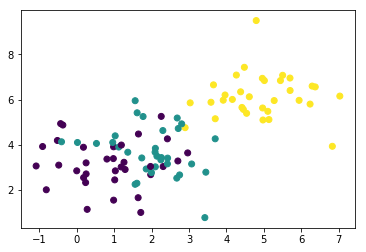

In [12]:
plt.scatter(samples[:,0], samples[:,1], c=target)

提取坐标点，对坐标点进行处理
- 获取边界
    - f1_min, f1_max = train[:,0].min()-0.5, train[:,1].max()+0.5
    - f2_min, f2_max = train[:,1].min()-0.5, train[:,1].max()+0.5
- 等差数列
    - f1 = np.linspace(f1_min, f1_max,200)
    - f2 = np.linspace(f2_min, f2_max, 200)
- f1和f2交叉、合并成X_test测试数据
    - f1_m,f2_m = np.meshgrid(f1, f2)
    - X_test = np.c_[f1_m.ravel(),f2_m.ravel()]

In [18]:
f1 = np.linspace(
    samples[:,0].min()-0.5,
    samples[:,0].max()+0.5,
    num=100
)
f2 = np.linspace(
    samples[:,1].min()-0.5,
    samples[:,1].max()+0.5,
    num=100
)

In [19]:
f1, f2 = np.meshgrid(f1, f2)
X_test = np.c_[f1.ravel(), f2.ravel()]  # 生成预测数据

In [20]:
X_test.shape

(10000, 2)

预测坐标点数据, 同时查看执行的时间 %time指令
- knn 预测
- logistic 预测

In [21]:
%time y_knn = knn.predict(X_test)

CPU times: user 19.3 ms, sys: 4.36 ms, total: 23.6 ms
Wall time: 26.8 ms


In [23]:
%time y_logistic = logistic.predict(X_test)

CPU times: user 1.83 ms, sys: 3.31 ms, total: 5.14 ms
Wall time: 5.66 ms


绘制图形
- matplotlib.colors.ListedColormap

画出两种模型的真实数据与预测数据的散点图

In [26]:
from matplotlib.colors import ListedColormap

In [27]:
cmap = ListedColormap(['#cc0000', '#c4c488', '#88c2d0'])

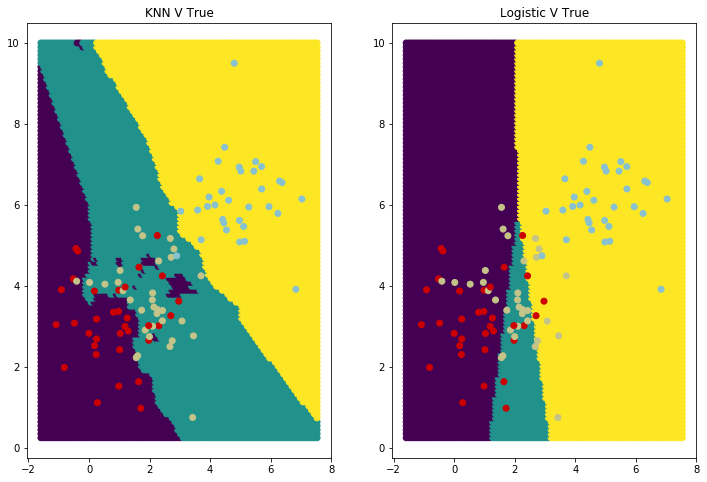

In [28]:
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(121)
ax1.scatter(X_test[:, 0], X_test[:,1], c=y_knn)
ax1.scatter(samples[:,0], samples[:,1], c=target, cmap=cmap)
ax1.set_title('KNN V True')

ax2 = plt.subplot(122)
ax2.scatter(X_test[:, 0], X_test[:,1], c=y_logistic)
ax2.scatter(samples[:,0], samples[:,1], c=target, cmap=cmap)
ax2.set_title('Logistic V True')

plt.show()

## 3、作业

#### 【第1题】预测年收入是否大于50K美元

读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [74]:
samples = pd.read_csv('../data/adults.txt')

In [75]:
samples.head(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [99]:
train = samples[['race','occupation','hours_per_week']].copy()
target = samples['sex']

In [100]:
train['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [101]:
race_dic = {
    'White':0,
    'Black':1, 
    'Asian-Pac-Islander':2,
    'Amer-Indian-Eskimo':3,
    'Other':4
}

In [102]:
train['race'] = train['race'].map(race_dic)

In [104]:
unique_arr = train['occupation'].unique()
def transform_occ(x):
    return np.argwhere(x == unique_arr)[0,0]

In [105]:
train['occupation'] = train['occupation'].map(transform_occ)

In [106]:
train

,race,occupation,hours_per_week
0,0,0,40
1,0,1,13
2,0,2,40
3,1,2,40
4,1,3,40
5,0,1,40
6,1,4,16
7,0,1,45
8,0,3,50
9,0,1,40


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [117]:
logistic = LogisticRegression(C=100)
knnclf = KNeighborsClassifier(n_neighbors=9)

logistic.fit(X_train,y_train)
knnclf.fit(X_train,y_train)

y1_ = logistic.predict(X_test)
y2_ = knnclf.predict(X_test)

print('logistic score is %f'%logistic.score(X_test,y_test))
print('knnclf score is %f'%knnclf.score(X_test,y_test))

logistic score is 0.681406
knnclf score is 0.714417


In [121]:
# 由于评分较低，把所有的数据特征都保留
train = samples.drop('sex',axis=1).copy()
target = samples.sex

In [123]:
train.head(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K


In [129]:
columns = train.columns[train.dtypes == object]
for column in columns:
    unique_arr = train[column].unique()
    def transform_obj(x):
        return np.argwhere(x == unique_arr)[0,0]
    train[column] = train[column].map(transform_obj)

In [130]:
train.dtypes

age               int64
workclass         int64
final_weight      int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
salary            int64
dtype: object

In [131]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [138]:
logistic = LogisticRegression(C=0.01)
knnclf = KNeighborsClassifier(n_neighbors=5)

logistic.fit(X_train,y_train)
knnclf.fit(X_train,y_train)

y1_ = logistic.predict(X_test)
y2_ = knnclf.predict(X_test)

print('logistic score is %f'%logistic.score(X_test,y_test))
print('knnclf score is %f'%knnclf.score(X_test,y_test))

logistic score is 0.668356
knnclf score is 0.667895


#### 【第2题】从疝气病症预测病马的死亡率
- horseColicTraining.txt 训练数据，最后一列为死亡率
- horseColicTest.txt 预测数据，最后一列为死亡率(1为死亡， 0未死)

要求：比较 所有线性回归模型 与 Logistic回归模型的得分比较